In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 28.84 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


**Dataset:- plant_village**

[Tensorflow dataset link](https://https://www.tensorflow.org/datasets/catalog/plant_village)



In [ ]:
import os
import numpy as np
import csv
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from tensorflow.keras.optimizers import RMSprop

In [ ]:
TRAIN_DIR= os.path.join('/content/PlantVillage-Dataset/raw/color')
print(len(os.listdir(TRAIN_DIR)))

38


**ADDING AUGMENTATION**

In [ ]:
training_datagen= ImageDataGenerator()

In [ ]:
datagen= ImageDataGenerator(validation_split=0.3,rescale=1./255)
train_gen = datagen.flow_from_directory( TRAIN_DIR,target_size=(150,150),class_mode='categorical', subset='training')
validation_gen = datagen.flow_from_directory(TRAIN_DIR,target_size=(150,150),class_mode='categorical',subset='validation')

Found 38029 images belonging to 38 classes.
Found 16276 images belonging to 38 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(38, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [ ]:
history = model.fit(train_gen,batch_size=100,epochs=15, 
                    validation_data=validation_gen,validation_batch_size=15,
                    verbose=1,workers=3)

Epoch 1/15
1189/1189 [==============================] - 98s 83ms/step - loss: 2.5749 - acc: 0.3090 - val_loss: 2.0474 - val_acc: 0.4324
Epoch 2/15
1189/1189 [==============================] - 98s 82ms/step - loss: 1.7040 - acc: 0.5169 - val_loss: 1.4574 - val_acc: 0.5824
Epoch 3/15
1189/1189 [==============================] - 95s 80ms/step - loss: 1.2851 - acc: 0.6255 - val_loss: 1.1324 - val_acc: 0.6667
Epoch 4/15
1189/1189 [==============================] - 99s 83ms/step - loss: 1.0375 - acc: 0.6913 - val_loss: 0.9687 - val_acc: 0.7093
Epoch 5/15
1189/1189 [==============================] - 97s 82ms/step - loss: 0.8728 - acc: 0.7384 - val_loss: 0.8186 - val_acc: 0.7474
Epoch 6/15
1189/1189 [==============================] - 98s 82ms/step - loss: 0.7508 - acc: 0.7702 - val_loss: 0.7140 - val_acc: 0.7781
Epoch 7/15
1189/1189 [==============================] - 97s 81ms/step - loss: 0.6567 - acc: 0.7973 - val_loss: 0.6283 - val_acc: 0.8025
Epoch 8/15
1189/1189 [==========================

In [ ]:
model.save("plantDisease.h5")

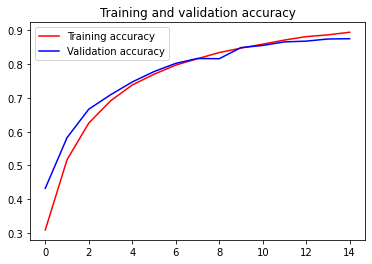

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
#test data generator
datagen= ImageDataGenerator(rescale=1./255)
TEST_DIR='/content/PlantVillage-Dataset/raw/color'
test_gen = datagen.flow_from_directory(TEST_DIR,target_size=(150,150),class_mode='categorical')
score,acc= model.evaluate(test_gen,max_queue_size=10,workers=2)

Found 54305 images belonging to 38 classes.
1698/1698 [==============================] - 87s 51ms/step - loss: 0.3197 - acc: 0.8989


# **Problem arises here as we have to pass path for the image directory as 1st parameter in *"flow_from_dataframe"*, but we have tfrecords as dataset.**

In [ ]:
#another alternative for flow_from_dataframe is flow_from_directory which will work only in case of file directories
                   
train_generator = training_datagen.flow_from_dataframe(
	raw_train,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_dataframe(
	raw_validation,
	target_size=(150,150),
	class_mode='categorical'
)

AttributeError: ignored

[medium post acc 94%](https://https://www.google.com/search?rlz=1C1NDCM_enIN810IN810&sxsrf=ALeKk0094TkgRTj40Jb5_TunPCD0M5ty1A%3A1592587651146&ei=g_XsXtjGCKaD4-EPt92zkAI&q=plant+disease+detection+using+tensorflow&oq=plant+village+dataset+github&gs_lcp=CgZwc3ktYWIQARgBMgQIABBHMgQIABBHMgQIABBHMgQIABBHMgQIABBHMgQIABBHMgQIABBHMgQIABBHUABYAGDgUWgAcAJ4AIABAIgBAJIBAJgBAKoBB2d3cy13aXo&sclient=psy-ab)

In [ ]:
history = model.fit_generator(raw_train, epochs=25, validation_data = raw_validation, verbose = 1)